In [422]:
E=2*(10**11) # Па - Модуль Юнга
I=873 * 10**(-8)
a=2
b=5
c=8
d=10
e=14
f=16
g=18
h=20 #Длина балки
k=1000 #Жесткость пружины
P=10000 #Сосредоточенная сила в точке (с)
Ma=1000 #Момент в точке (a)
q=0 #Распределенная нагрузка от точек (e до g)
import numpy as np
L=np.array( [ [b**3/6, b**2/2, 0, 0, 0], [d**3/6, d**2/2, (d-b)**3/6, 0, 0], [f**3/6, f**2/2, (f-b)**3/6, -E*I, (f-d)**3/6], [h, 1, (h-b), k*(h-f), h-d], [1, 0, 1, k, 1] ])
v=np.array( [Ma/2 * (b-a)**2, Ma*(d-a)**2/2 + P/6*(d-c)**3, Ma/2*(f-a)**2 + P/6 * (f-c)**3 + q/24 *(f-e)**4, Ma + P*(h-c) +q/2*(h-e)**2 - q/2*(h-g)**2, P + q*(h-e) - q*(h-g)])  
x1 = np.linalg.solve(L, v) # (R0,M0,Rb,Wf,Rd)
z=list(map(lambda x: h*x/1000, range(0,1001)))
#z = np.linspace(0, h, 1000) # Генерируем равномерный набор точек по всей длине балки
z1=[0,a, b, c, d, e, f, g, h] #Список точек приложений нагрузки
z.extend(z1)
z.sort()
print (x1[3])


0.04479661912308501


In [423]:
def W(x):
    w=x1[0]/6*x**3 + x1[1]/2* x**2
    if x>a:
        w=w-Ma/2*(x-a)**2
    else:
        return w/(E*I)
    if x>b:
        w = w+x1[2]/6*(x-b)**3
    else:
        return w/(E*I)
    if x>c:
        w=w-P/6*(x-c)**3
    else:
        return w/(E*I)
    if x>d:
        w=w+x1[4]/6*(x-d)**3
    else:
        return w/(E*I)
    if x>e:
        w=w-q/24*(x-e)**4
    else:
        return w/(E*I)
    if x>f:
        w=w+k*x1[3]/6*(x-f)**3 ##
    else:
        return w/(E*I)
    if x>g:
        w=w+q/24*(x-g)**4
    else:
        return w/(E*I)
    return w/(E*I)
def th(x):
    th=x1[0]/2*x**2 + x1[1]* x
    if x>a:
        th=th-Ma*(x-a)
    else:
        return th/(E*I)
    if x>b:
        th = th+x1[2]/2*(x-b)**2
    else:
        return th/(E*I)
    if x>c:
        th=th-P/2*(x-c)**2
    else:
        return th/(E*I)
    if x>d:
        th=th+x1[4]/2*(x-d)**2
    else:
        return th/(E*I)
    if x>e:
        th=th-q/6*(x-e)**3
    else:
        return th/(E*I)
    if x>f:
        th=th-k*x1[3]/2*(x-f)**2
    else:
        return th/(E*I)
    if x>g:
        th=th+q/6*(x-g)**3
    else:
        return th/(E*I)
    return th/(E*I)
def M(x):
    M=x1[0]*x + x1[1]
    if x>a:
        M=M-Ma
    else:
        return M
    if x>b:
        M = M+x1[2]*(x-b)
    else:
        return M
    if x>c:
        M = M-P*(x-c)
    else:
        return M
    if x>d:
        M=M+x1[4]*(x-d)
    else:
        return M
    if x>e:
        M=M-q/2*(x-e)**2
    else:
        return M
    if x>f:
        M=M-k*x1[3]*(x-f)
    else:
        return M
    if x>g:
        M=M+q/2*(x-g)**2
    else:
        return M
    return M
def Q(x):
    Q=x1[0]    
    if x>b:
        Q =Q+x1[2]
    else:
        return Q
    if x>c:
        Q=Q-P
    else:
        return Q
    if x>d:
        Q=Q+x1[4]
    else:
        return Q
    if x>e:
        Q=Q-q*(x-e)
    else:
        return Q
    if x>f:
        Q=Q-k*x1[3]
    else:
        return Q
    if x>g:
        Q=Q+q*(x-g)
    else:
        return Q
    return Q

In [424]:
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure
#Прогиб
def GraphPlot(W,th,M,Q,z1): 
    #z = np.linspace(0, h, 100) # Генерируем равномерный набор точек по всей длине балки  
    plt.rcParams["figure.figsize"] = [12,8]
    plt.subplot (4, 1,1)
    #plt.figure(figsize=(8,8));
    #ax = plt.gca() 
    #ax.invert_xaxis()   
    plt.plot( z, list( map( lambda x :W(x), z ) ), 'g-', z1, list( map( lambda x :W(x), z1 ) ), 'b.')
    plt.xlabel( "z" ); 
    plt.ylabel( "w(z)");
    #plt.title ("Прогиб");
    plt.grid()
    plt.xticks( list( range(0, h+1, 1) ) );
    #Угол
    plt.subplot (4, 1, 2)
    #ax = plt.gca() 
    #ax.invert_xaxis() 
    plt.plot( z, list( map( lambda x :th(x), z ) ), 'g-', z1, list( map( lambda x :th(x), z1 ) ), 'b.')
    plt.xlabel( "z" ); 
    plt.ylabel( "theta(z)");
    #plt.title ("Угол");
    plt.grid()
    plt.xticks( list( range(0, h+1, 1) ) );
    #Момент
    plt.subplot (4, 1, 3)
    #ax = plt.gca() 
    #ax.invert_xaxis()
    plt.plot( z, list( map( lambda x :M(x), z ) ), 'g-', z1, list( map( lambda x :M(x), z1 ) ), 'b.')
    plt.xlabel( "z" ); 
    plt.ylabel( "M(z)");
    #plt.title ("Момент");
    plt.grid()
    plt.xticks( list( range(0, h+1, 1) ) );
    #Перерезывающая сила
    plt.subplot (4, 1, 4)
    #ax = plt.gca() 
    #ax.invert_xaxis()
    plt.plot( z, list( map( lambda x :Q(x), z ) ), 'g-', z1, list( map( lambda x :Q(x), z1 ) ), 'b.')
    plt.xlabel( "z" ); 
    plt.ylabel( "Q(z)");
    #plt.title ("Перерезывающая сила");
    plt.grid()
    plt.xticks( list( range(0, h+1, 1) ) );

0.0752767929594107


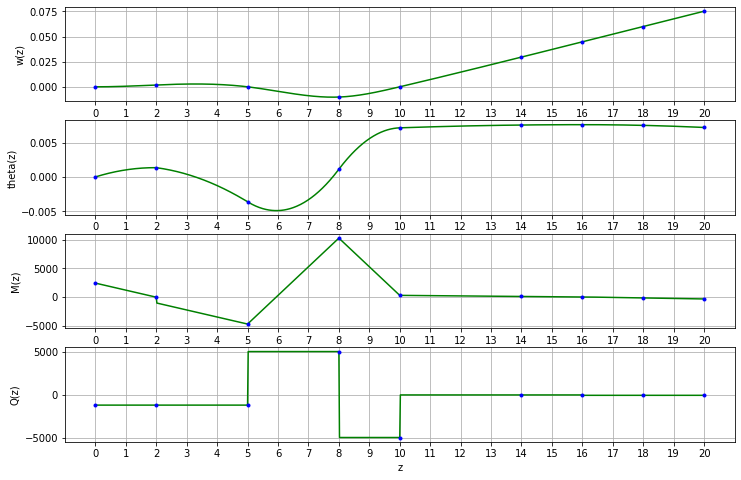

In [425]:
GraphPlot(W,th,M,Q,z1)
print(W(20))

In [426]:
def Get_Local_Rigidity(i):
    L=[2,3,3,2,4,2,2,2]
    x0=0.0#np.sum(L[0:i])
    return np.array([[12/L[i]**3,6/L[i]**2,-12/L[i]**3,6/L[i]**2],[6/L[i]**2,4/L[i]+4*x0**2/L[i]**3-4*x0/L[i]**2,-6/L[i]**2,2/L[i]+4*x0**2/L[i]**3],[-12/L[i]**3,-6/L[i]**2,12/L[i]**3,-6/L[i]**2],[6/L[i]**2,2/L[i]+4*x0**2/L[i]**3,-6/L[i]**2,4/L[i]+4*x0**2/L[i]**3+4*x0/L[i]**2]])

In [427]:
def Get_Global_Rigidity(n):
    Global_Rigidity=np.zeros((2*n+2, 2*n+2))
    for k1 in range(0,n,1):
        L_Rigidity=Get_Local_Rigidity(k1)
        for i in range(4):
            for j in range(4):
                Global_Rigidity[i+2*k1][j+2*k1]=Global_Rigidity[i+2*k1][j+2*k1]+L_Rigidity[i][j]
    return Global_Rigidity           
               

In [438]:
import numpy as np
Elements_Length=[2,3,3,2,4,2,2,2]
Global_Rigidity=Get_Global_Rigidity(8)     
R=np.zeros((18))
def Kinem(N):
    Global_Rigidity[N][N]=1
    for i in range(1,4):        
        Global_Rigidity[N][N+i]=0.0
        Global_Rigidity[N][N-i]=0.0
        Global_Rigidity[N-i][N]=0.0
        Global_Rigidity[N+i][N]=0.0        
Kinem(0)
Kinem(1)
R[3]=Ma/(E*I)
Kinem(4)
R[6]=-P/(E*I)
Kinem(8)
R[10]=-q/(E*I)
R[11]=-q/(3*E*I)
R[12]=-2*q/(E*I)
R[13]=q/(3*E*I)
R[14]=-q/(E*I)
Global_Rigidity[12][12]=Global_Rigidity[12][12]+k
U = np.linalg.solve(Global_Rigidity, R) 


In [439]:
def Which_Element(x):
    if 0<=x<=2:
        return 0
    if 2<x<=5:
        return 1
    if 5<x<=8:
        return 2
    if 8<x<=10:
        return 3
    if 10<x<=14:
        return 4
    if 14<x<=16:
        return 5
    if 16<x<=18:
        return 6    
    return 7
    
def Deflection(x):
    Element_Length=np.array([2,3,3,2,4,2,2,2])  
    def N1(y):
        return 1-3*y**2 + 2*y**3
    def N2(y):
        return 3*y**2 - 2*y**3 
    def M1(y):
        return y-2*y**2 + y**3 
    def M2(y):
        return -y**2 + y**3 
    i=Which_Element(x)
    ksi=(x-np.sum(Element_Length[0:i]))/Element_Length[i]    
    return U[2*i]*N1(ksi) + U[2*i+ 1]*Element_Length[i]*M1(ksi) + U[2*i + 2]*N2(ksi) + U[2*i + 3]*Element_Length[i]*M2(ksi)

 
   

In [440]:
print (W(20)-Deflection(20))
print(W(20))
print (Deflection(20))

0.0833708578818382
0.0752767929594107
-0.008094064922427514


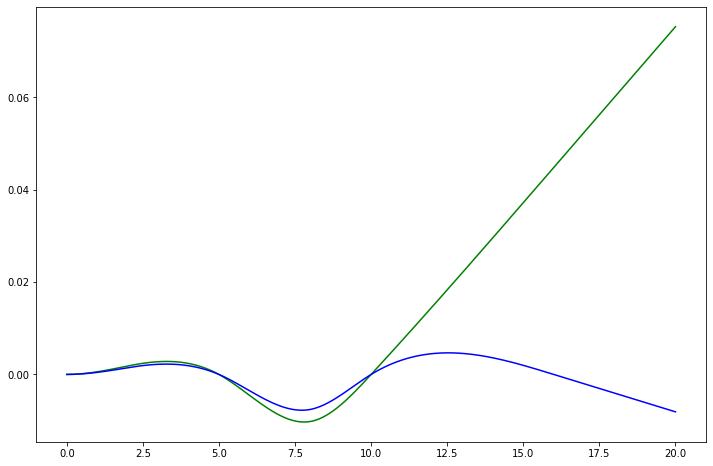

In [436]:
plt.plot( z, list( map( lambda x :W(x), z ) ), 'g-', z, list( map( lambda x :Deflection(x), z ) ), 'b-')

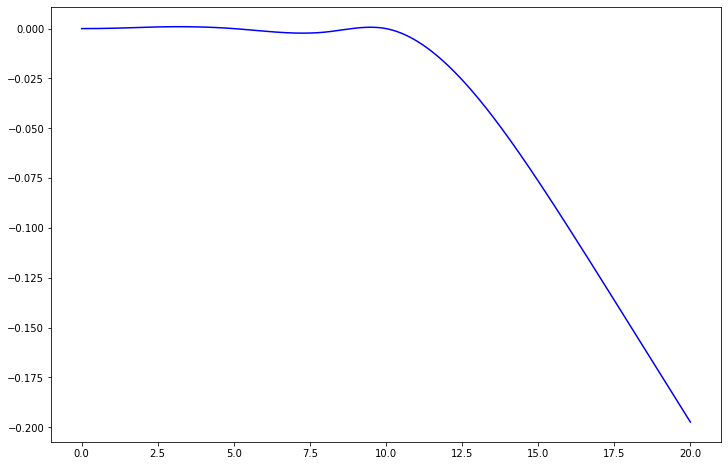

In [363]:
plt.plot( z, list( map( lambda x :Deflection(x), z ) ), 'b-')

In [226]:
2**3/6

1.3333333333333333

In [227]:
8/6


1.3333333333333333

In [421]:
print (W(20)-Deflection(20))
print(W(20))
print (Deflection(20))

-7.632783294297951e-16
0.06938307969235799
0.06938307969235875
